<a href="https://colab.research.google.com/github/Adian17/Lewandowski_project/blob/main/correlation_preNHL_vs_NHL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_byLeague.csv to cleaned_byLeague.csv


In [ ]:
import os
print(os.listdir())

['.config', 'cleaned_byLeague.csv', 'sample_data']


In [29]:
# Select relevant columns
df = df[['Player', 'League', 'GP', 'G', 'A', 'PTS']]
df = df[df['League'] != 'Exhibition']


# Get the list of unique leagues excluding NHL
leagues = df['League'].unique()
leagues = [league for league in leagues if league != 'NHL']

# Initialize a dictionary to store correlation results
correlation_results = {'League': [], 'Goals_Corr': [], 'Assists_Corr': [], 'Points_Corr': []}

# Loop through each league and calculate correlations with NHL performance
for league in leagues:
    pre_nhl = df[df['League'] == league]
    nhl = df[df['League'] == 'NHL']

    # Merge pre-NHL and NHL stats on Player
    merged = pd.merge(pre_nhl, nhl, on='Player', suffixes=('_preNHL', '_NHL'))

    # Compute correlations (check for empty dataframes to avoid errors)
    if not merged.empty:
        goals_corr = merged[['G_preNHL', 'G_NHL']].corr().iloc[0, 1]
        assists_corr = merged[['A_preNHL', 'A_NHL']].corr().iloc[0, 1]
        points_corr = merged[['PTS_preNHL', 'PTS_NHL']].corr().iloc[0, 1]
    else:
        goals_corr, assists_corr, points_corr = None, None, None

    # Store results
    correlation_results['League'].append(league)
    correlation_results['Goals_Corr'].append(goals_corr)
    correlation_results['Assists_Corr'].append(assists_corr)
    correlation_results['Points_Corr'].append(points_corr)

# Create a DataFrame from results
correlation_df = pd.DataFrame(correlation_results)
correlation_df.sort_values(by='Points_Corr', ascending=False, inplace=True)

# Convert correlations to percentages
correlation_df[['Goals_Corr', 'Assists_Corr', 'Points_Corr']] *= 100
correlation_df = correlation_df.round(2)

# Show the final dataframe
print("Updated Correlation Results:\n", correlation_df)

Updated Correlation Results:
       League  Goals_Corr  Assists_Corr  Points_Corr
46   Denmark         NaN        100.00       100.00
19       EHL         NaN        100.00       100.00
29      CJHL      -29.69         84.43        96.71
34      SJHL       96.09         90.11        93.49
37       Ind       18.38         92.33        73.20
33  Swiss-Sw        8.60         99.16        69.89
10      ECAC       41.73         65.26        57.47
28      CCHL       32.40         60.69        54.11
12       WHL       40.50         38.79        39.63
4        OHL       43.59         35.23        38.26
26    Mestis       24.14         46.64        35.71
6      Swe-1       29.56         37.78        35.06
23   Rus-MHL       33.11         24.23        29.60
30      NAHL       43.26         18.00        27.24
31      WCHA       45.96         16.43        26.78
16      NCHC       26.95         25.81        25.46
2      QMJHL       26.76         25.03        25.24
18       KHL       20.95         2

# Deleting unncessary leagues with no correlation

In [30]:
# Drop rows where any correlation value is NaN
correlation_df.dropna(subset=['Goals_Corr', 'Assists_Corr', 'Points_Corr'], inplace=True)


In [31]:
# Show the updated dataframe
print(correlation_df)

      League  Goals_Corr  Assists_Corr  Points_Corr
29      CJHL      -29.69         84.43        96.71
34      SJHL       96.09         90.11        93.49
37       Ind       18.38         92.33        73.20
33  Swiss-Sw        8.60         99.16        69.89
10      ECAC       41.73         65.26        57.47
28      CCHL       32.40         60.69        54.11
12       WHL       40.50         38.79        39.63
4        OHL       43.59         35.23        38.26
26    Mestis       24.14         46.64        35.71
6      Swe-1       29.56         37.78        35.06
23   Rus-MHL       33.11         24.23        29.60
30      NAHL       43.26         18.00        27.24
31      WCHA       45.96         16.43        26.78
16      NCHC       26.95         25.81        25.46
2      QMJHL       26.76         25.03        25.24
18       KHL       20.95         24.95        22.59
1     H-East       33.89         15.76        19.38
25     GOJHL       15.63         20.95        17.42
20       SEL

In [32]:
import matplotlib.pyplot as plt

def plot_correlation(df, column, title):
    """
    Plots the correlation for a given column with wider bars and clearer labels.

    Parameters:
    - df: DataFrame containing correlation data.
    - column: The correlation column to plot (e.g., 'Goals_Corr').
    - title: The title for the plot.
    """
    plt.figure(figsize=(12, 10))  # Bigger figure for better readability
    plt.barh(
        df['League'],
        df[column],
        color='skyblue',
        height=0.8  # Wider bars
    )
    plt.xlabel('Correlation (%)', fontsize=14)
    plt.ylabel('League', fontsize=14)
    plt.title(f'{title} Correlation (%)', fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines
    plt.tight_layout()  # Prevent overlap
    plt.show()


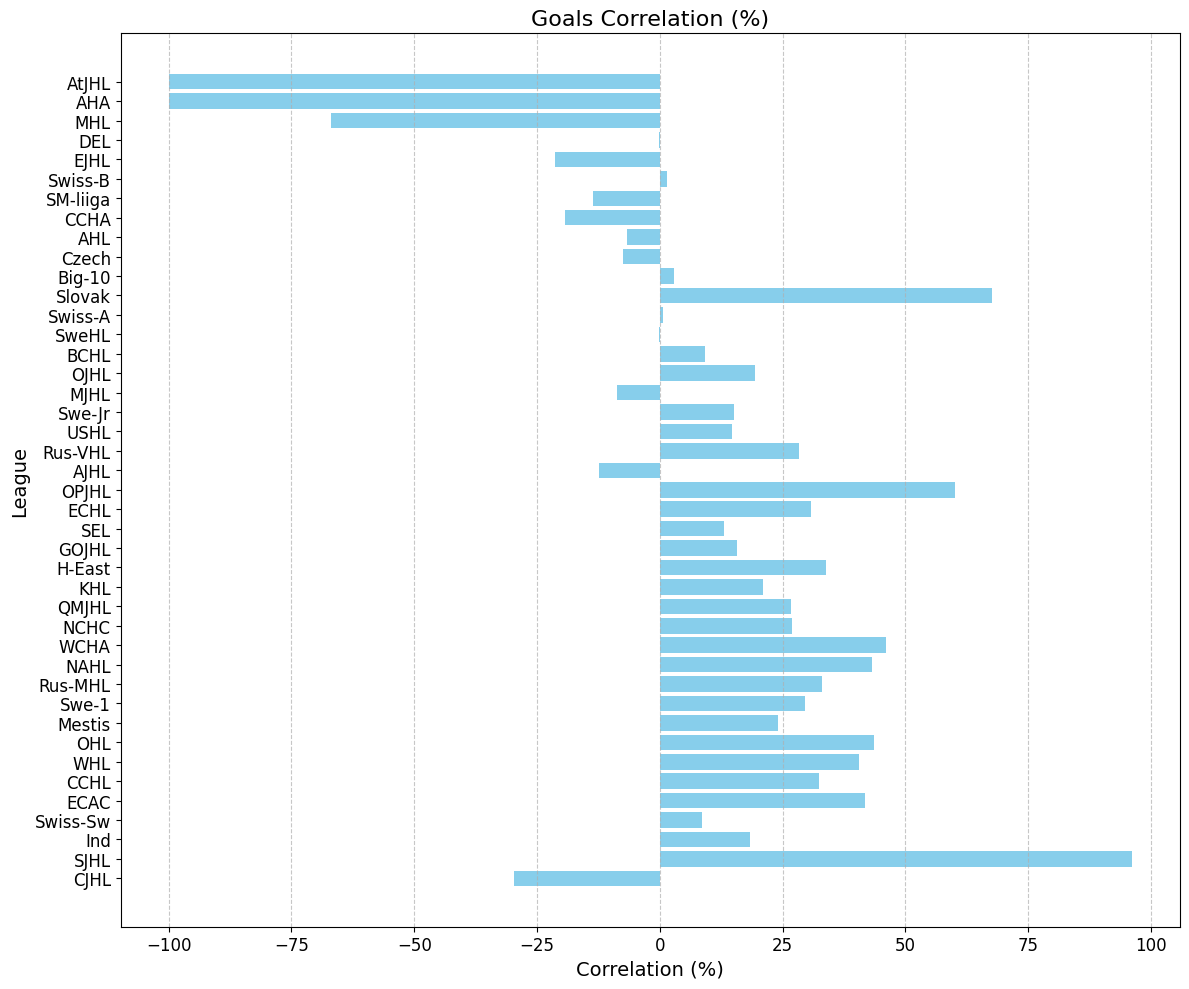

In [33]:

# Goals Correlation
plot_correlation(correlation_df, 'Goals_Corr', 'Goals')


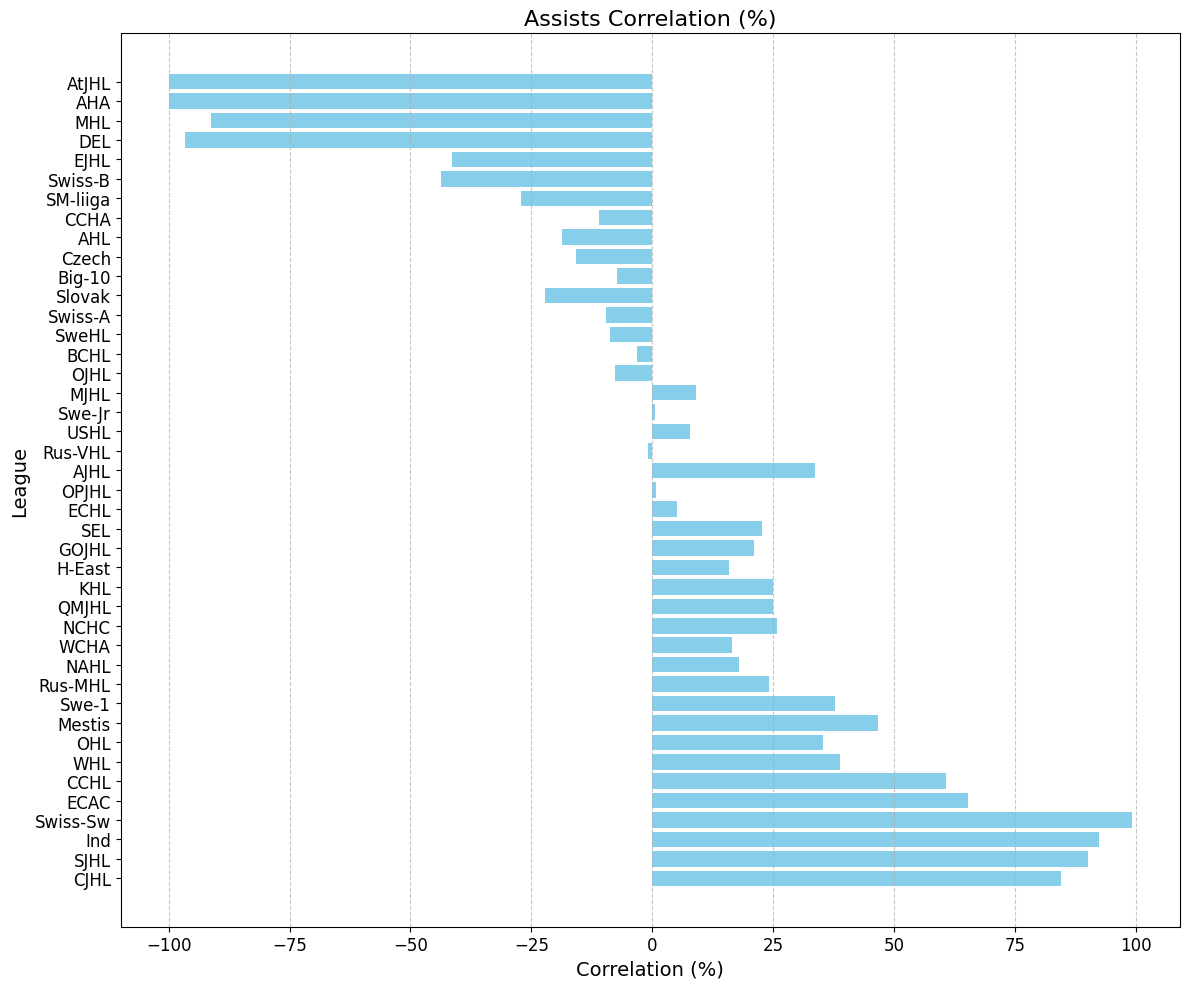

In [34]:

# Assists Correlation
plot_correlation(correlation_df, 'Assists_Corr', 'Assists')


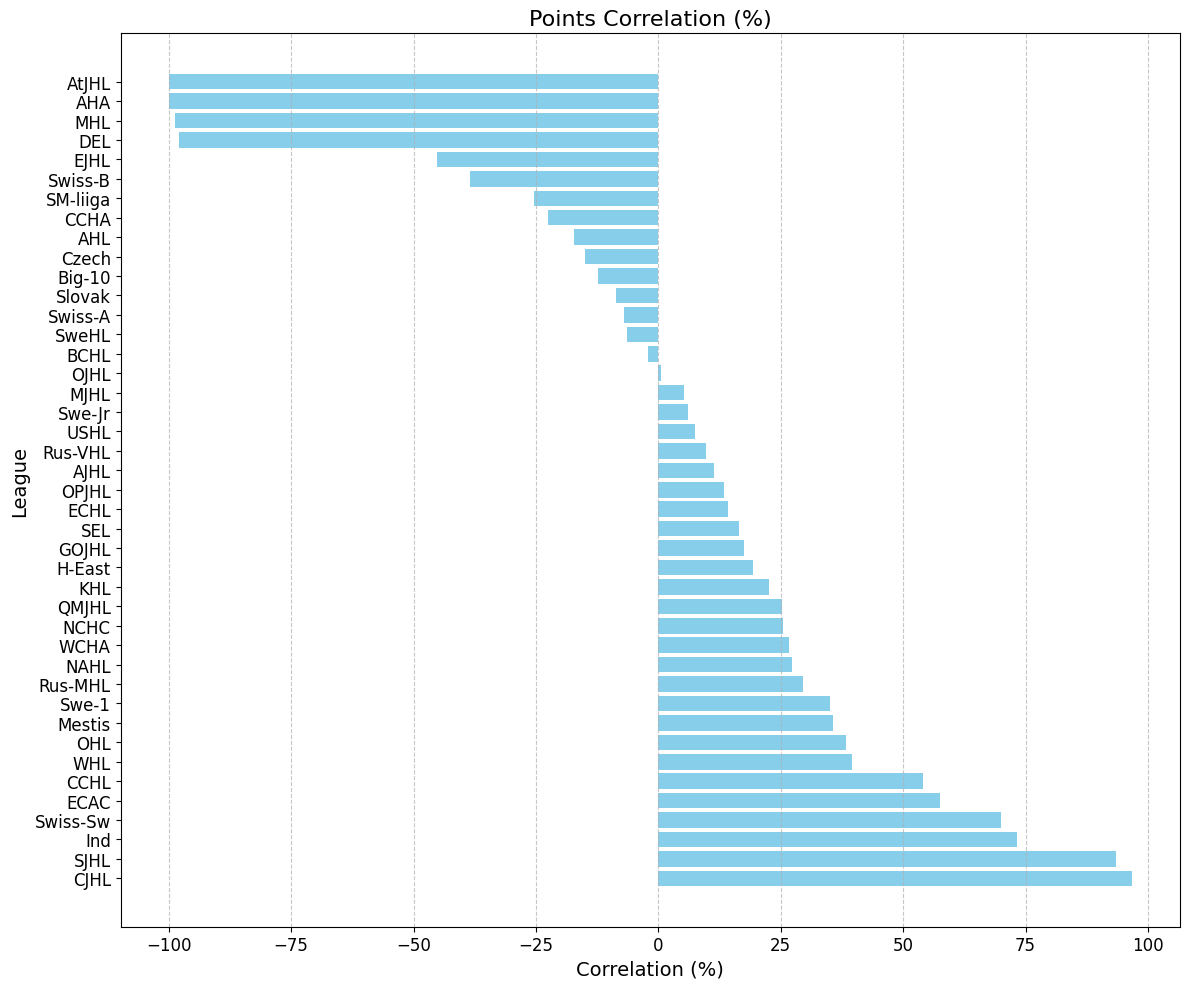

In [35]:
# 3️⃣ Points Correlation
plot_correlation(correlation_df, 'Points_Corr', 'Points')

# What league produces the best NHL players

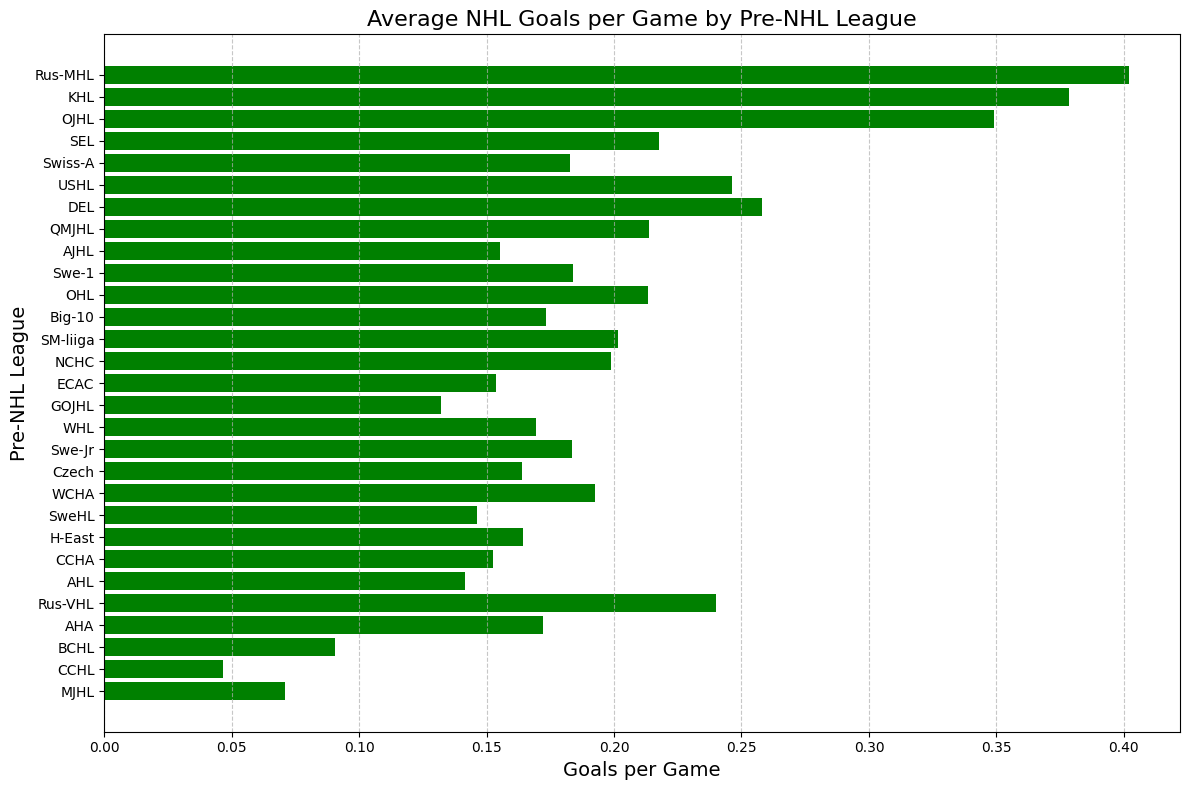

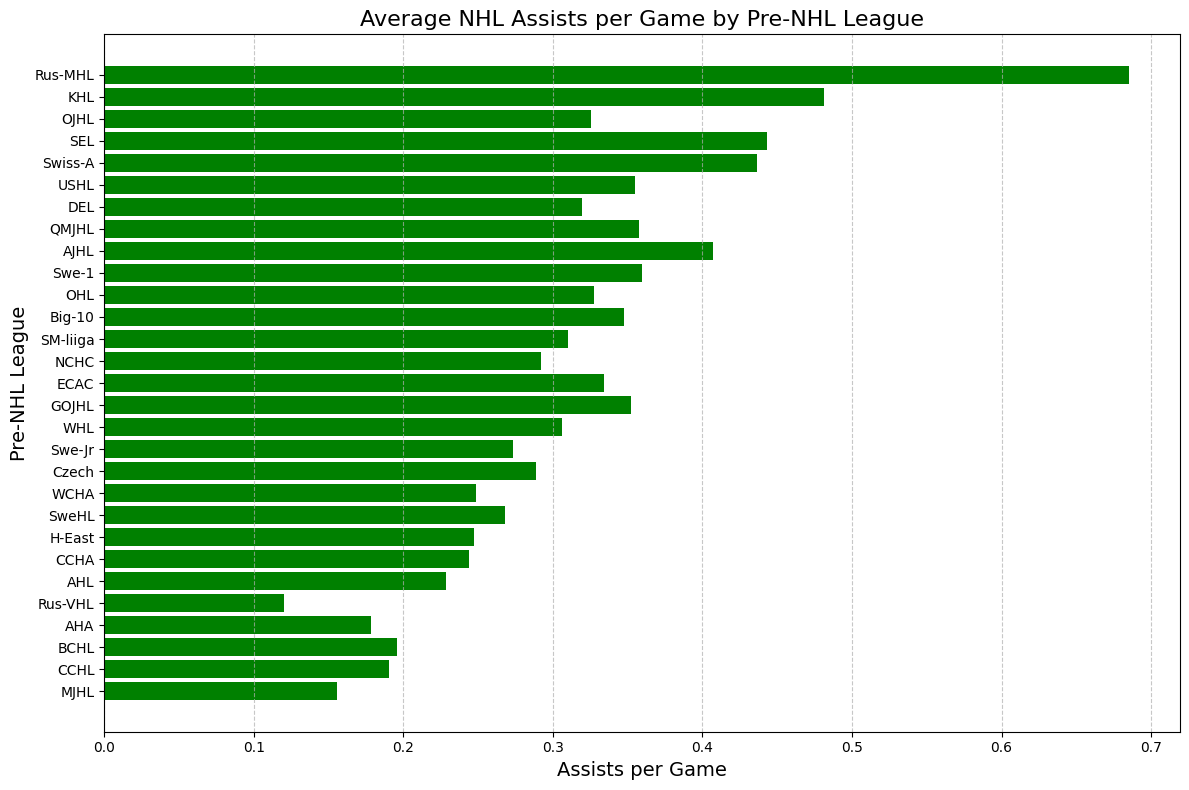

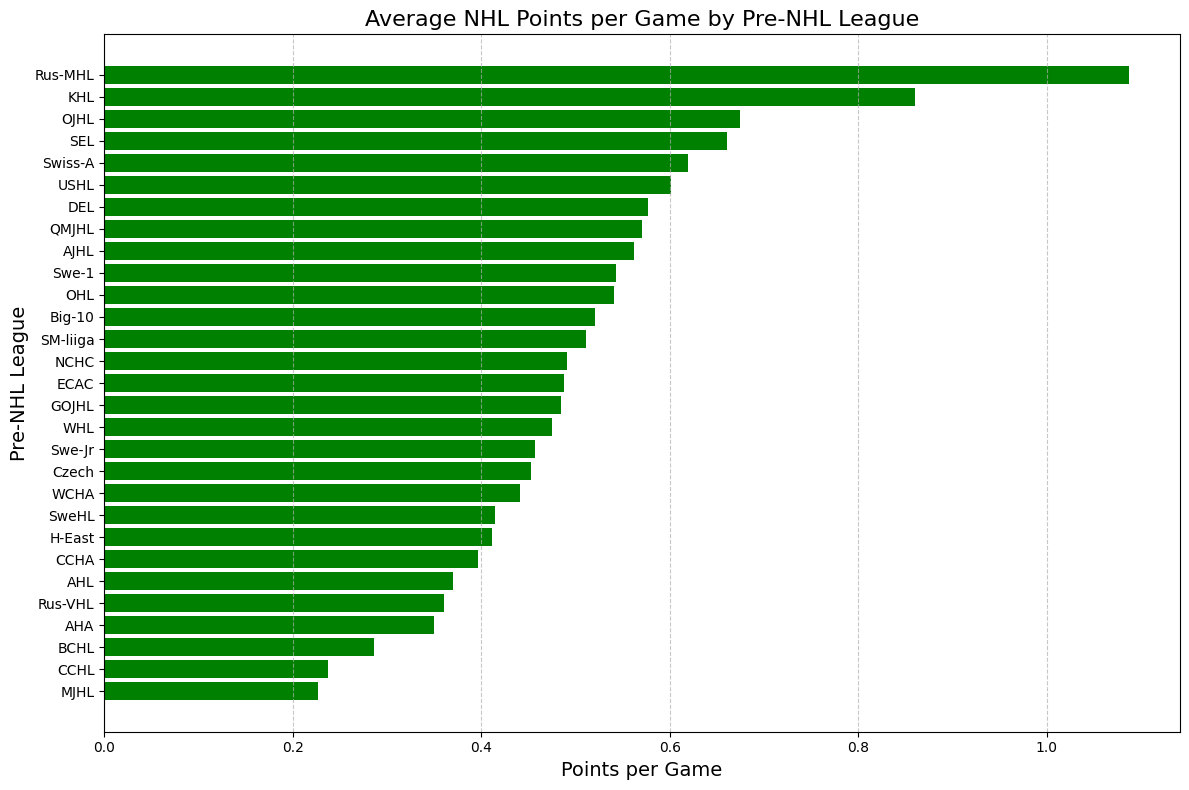

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cleaned_byLeague.csv')
df['League'] = df['League'].replace({'Russia': 'KHL'})

df = df[df['League'] != 'Exhibition']

# Select relevant columns
df = df[['Player', 'League', 'GP', 'G', 'A', 'PTS']]

# Filter only NHL stats
nhl_stats = df[df['League'] == 'NHL'][['Player', 'GP', 'G', 'A', 'PTS']]

# Get pre-NHL league for each player (league with most GP pre-NHL)
pre_nhl_league = (
    df[df['League'] != 'NHL']
    .sort_values(['Player', 'GP'], ascending=[True, False])
    .drop_duplicates('Player')[['Player', 'League']]
)

# Merge to link each player with their pre-NHL league and NHL performance
merged_df = pd.merge(pre_nhl_league, nhl_stats, on='Player')

# Compute NHL performance metrics per league
performance_by_league = merged_df.groupby('League').agg({
    'G': 'sum',
    'A': 'sum',
    'PTS': 'sum',
    'GP': 'sum'
}).reset_index()

performance_by_league['G_per_GP'] = performance_by_league['G'] / performance_by_league['GP']
performance_by_league['A_per_GP'] = performance_by_league['A'] / performance_by_league['GP']
performance_by_league['PTS_per_GP'] = performance_by_league['PTS'] / performance_by_league['GP']

# Sort leagues by Points per Game in NHL
performance_by_league.sort_values(by='PTS_per_GP', ascending=False, inplace=True)

# Plotting function
def plot_metric(df, metric, title):
    plt.figure(figsize=(12, 8))
    plt.barh(df['League'], df[metric], color='green', height=0.8)
    plt.xlabel(f'{title} per Game', fontsize=14)
    plt.ylabel('Pre-NHL League', fontsize=14)
    plt.title(f'Average NHL {title} per Game by Pre-NHL League', fontsize=16)
    plt.gca().invert_yaxis()  # Highest at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize performance
plot_metric(performance_by_league, 'G_per_GP', 'Goals')
plot_metric(performance_by_league, 'A_per_GP', 'Assists')
plot_metric(performance_by_league, 'PTS_per_GP', 'Points')

# Defining Leagues Difficulties

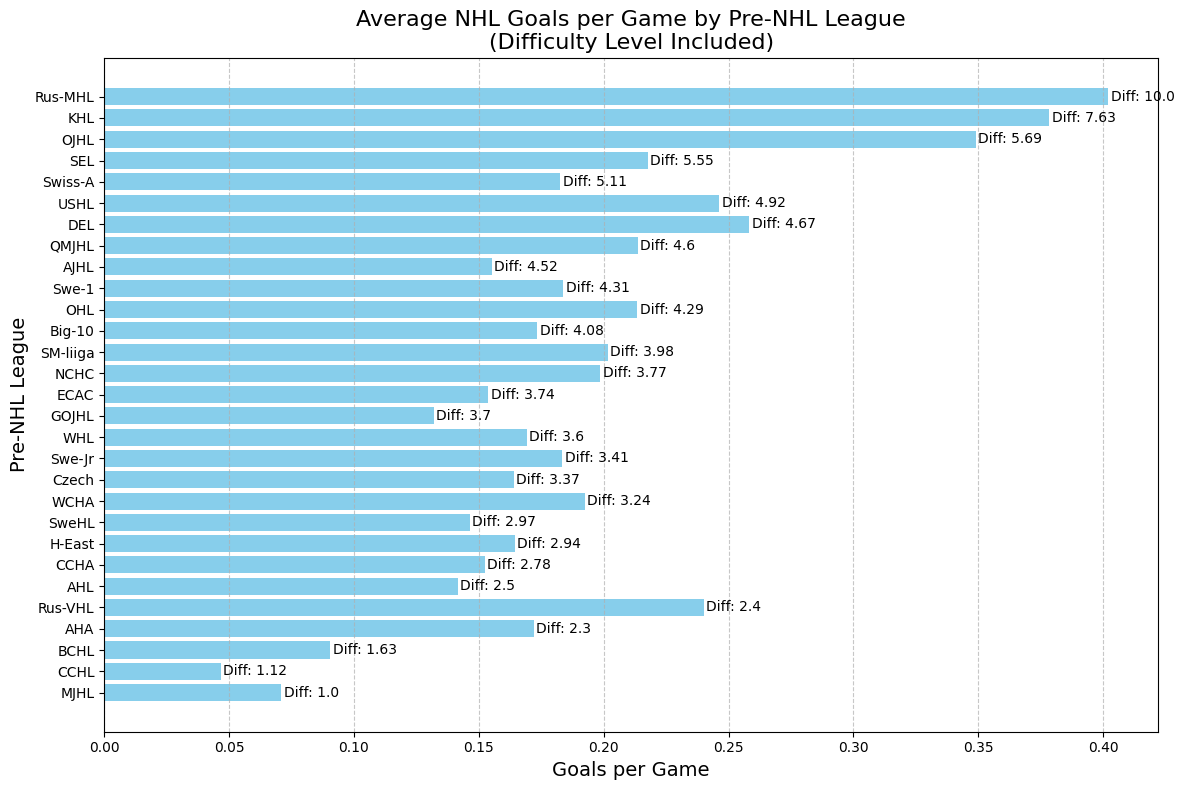

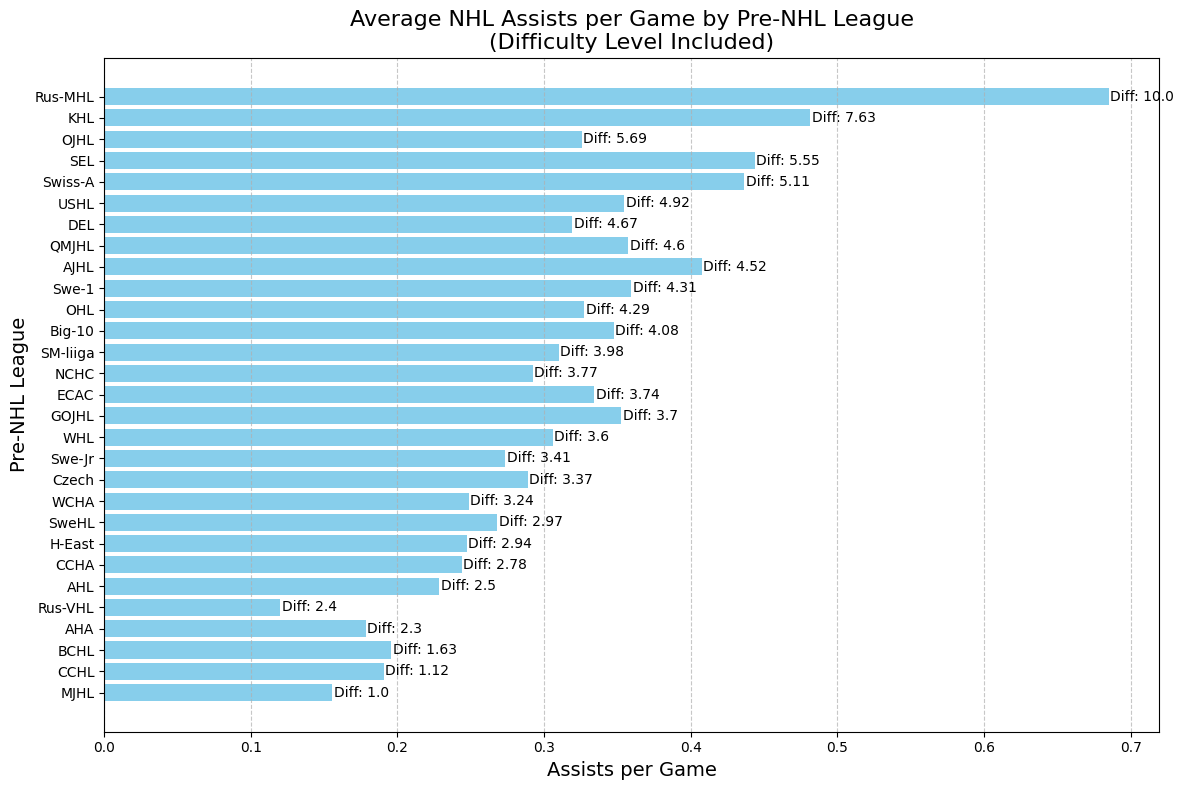

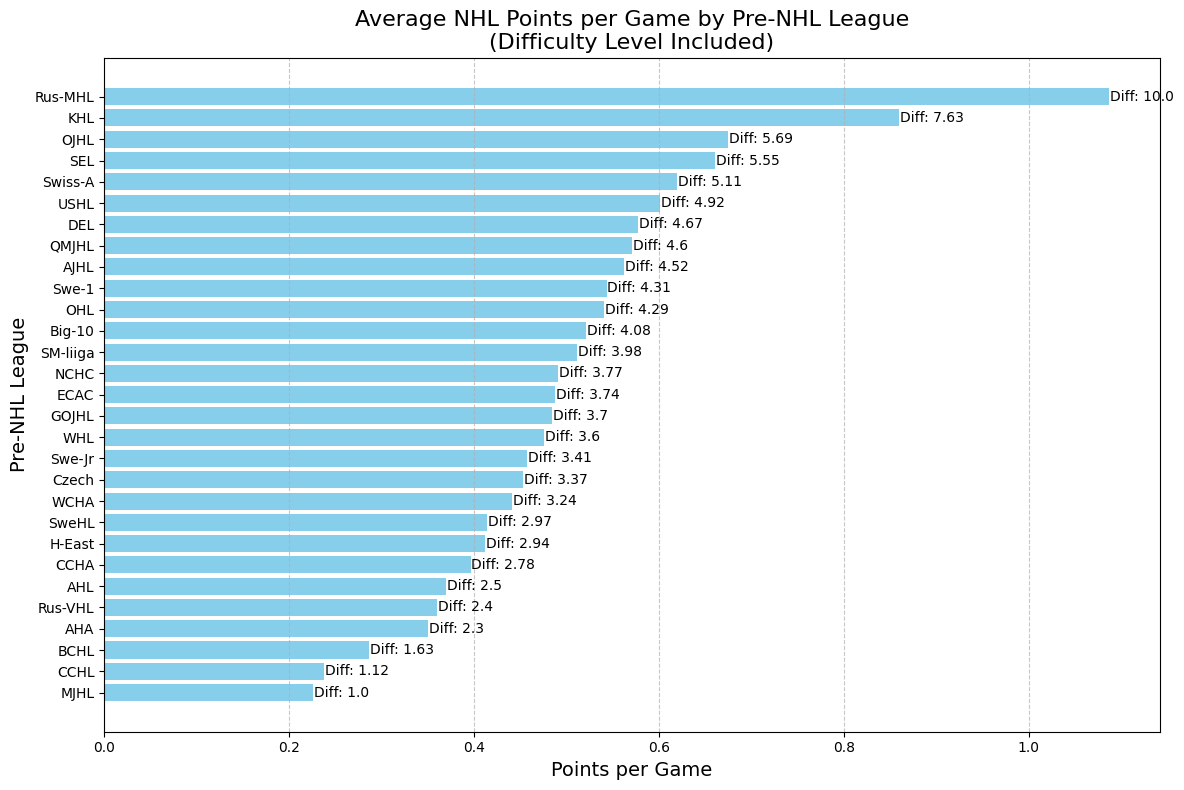

      League        G        A      PTS       GP  G_per_GP  A_per_GP  \
18   Rus-MHL    379.0    646.0   1025.0    943.0  0.401909  0.685048   
12       KHL   2633.0   3351.0   5984.0   6959.0  0.378359  0.481535   
16      OJHL    224.0    209.0    433.0    642.0  0.348910  0.325545   
20       SEL   1400.0   2853.0   4253.0   6434.0  0.217594  0.443426   
25   Swiss-A    279.0    667.0    946.0   1528.0  0.182592  0.436518   
26      USHL   2560.0   3688.0   6248.0  10398.0  0.246201  0.354684   
8        DEL     55.0     68.0    123.0    213.0  0.258216  0.319249   
17     QMJHL   4130.0   6912.0  11042.0  19340.0  0.213547  0.357394   
2       AJHL    211.0    554.0    765.0   1360.0  0.155147  0.407353   
22     Swe-1    353.0    690.0   1043.0   1920.0  0.183854  0.359375   
15       OHL  11473.0  17590.0  29063.0  53745.0  0.213471  0.327286   
4     Big-10    617.0   1236.0   1853.0   3558.0  0.173412  0.347386   
21  SM-liiga   1687.0   2594.0   4281.0   8371.0  0.201529  0.30

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('cleaned_byLeague.csv')

# Merge "Russia" into "KHL"
df['League'] = df['League'].replace({'Russia': 'KHL'})

# Remove "Exhibition" league from the dataset
df = df[df['League'] != 'Exhibition']

# Select relevant columns
df = df[['Player', 'League', 'GP', 'G', 'A', 'PTS']]

# Filter only NHL stats
nhl_stats = df[df['League'] == 'NHL'][['Player', 'GP', 'G', 'A', 'PTS']]

# Get pre-NHL league for each player (league with most GP pre-NHL)
pre_nhl_league = (
    df[df['League'] != 'NHL']
    .sort_values(['Player', 'GP'], ascending=[True, False])
    .drop_duplicates('Player')[['Player', 'League']]
)

# Merge to link each player with their pre-NHL league and NHL performance
merged_df = pd.merge(pre_nhl_league, nhl_stats, on='Player')

# Compute NHL performance metrics per league
performance_by_league = merged_df.groupby('League').agg({
    'G': 'sum',
    'A': 'sum',
    'PTS': 'sum',
    'GP': 'sum'
}).reset_index()

performance_by_league['G_per_GP'] = performance_by_league['G'] / performance_by_league['GP']
performance_by_league['A_per_GP'] = performance_by_league['A'] / performance_by_league['GP']
performance_by_league['PTS_per_GP'] = performance_by_league['PTS'] / performance_by_league['GP']

# Correct Difficulty Level (High NHL performance = High difficulty)
scaler = MinMaxScaler(feature_range=(1, 10))  # 1 = lowest difficulty, 10 = highest difficulty
performance_by_league['Difficulty_Level'] = scaler.fit_transform(
    performance_by_league[['PTS_per_GP']]  # Direct scaling (no negative sign now)
).flatten()

performance_by_league['Difficulty_Level'] = performance_by_league['Difficulty_Level'].round(2)

# Sort leagues by Difficulty Level
performance_by_league.sort_values(by='Difficulty_Level', ascending=False, inplace=True)

# Plotting function with updated difficulty
def plot_metric(df, metric, title):
    plt.figure(figsize=(12, 8))
    bars = plt.barh(df['League'], df[metric], color='skyblue', height=0.8)
    plt.xlabel(f'{title} per Game', fontsize=14)
    plt.ylabel('Pre-NHL League', fontsize=14)
    plt.title(f'Average NHL {title} per Game by Pre-NHL League\n(Difficulty Level Included)', fontsize=16)

    # Show difficulty levels on bars
    for bar, diff in zip(bars, df['Difficulty_Level']):
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height() / 2, f'Diff: {diff}', va='center')

    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize performance with corrected difficulty levels
plot_metric(performance_by_league, 'G_per_GP', 'Goals')
plot_metric(performance_by_league, 'A_per_GP', 'Assists')
plot_metric(performance_by_league, 'PTS_per_GP', 'Points')

# Display the final DataFrame with corrected difficulty levels
print(performance_by_league)